In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

# Filtros passa-baixas

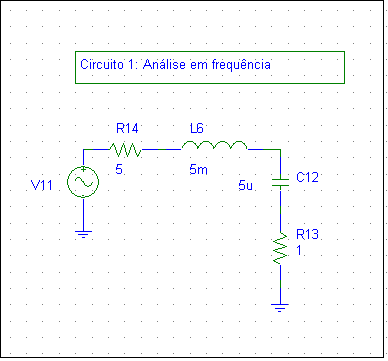

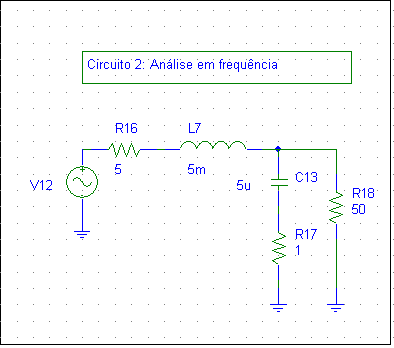

In [2]:
display(Image("cir1.png"), Image('cir2.png'))

In [3]:
!cat netlist.cir netlist1.cir

* Circuito 1
V11 1 0 dc 0 ac 1
r14 1 2 5
l6  2 3 5m
c12 3 4 5u
r13 4 0 1

* Circuito 2
V12 1 0 dc 0 ac 1
r16 1 2 5
l7  2 3 5m
c13 3 4 5u
r17 4 0 1
r18 3 0 50



## Circuito 1: análise em frequência

In [4]:
vo = np.genfromtxt('data/01-vo.csv')
vi = np.genfromtxt('data/01-vi.csv')

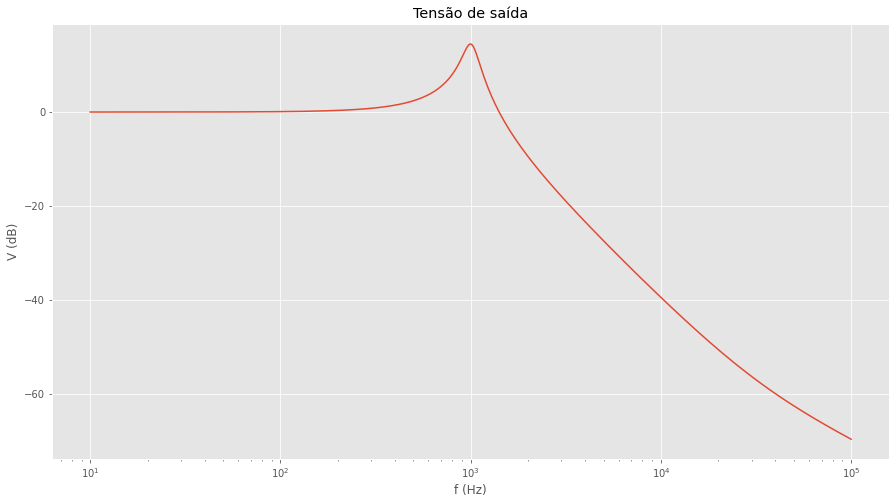

In [5]:
#%matplotlib notebook
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.semilogx(vo[:,0], vo[:,1])
ax1.set_ylabel("V (dB)")
ax1.set_xlabel("f (Hz)")
ax1.set_title("Tensão de saída")
plt.show()

Do gráfico acima tiramos os seguintes valores:

In [6]:
print(f"Valor de ressonância (f = {vo[np.argmax(vo[:,1]), 0]} Hz) : {np.max(vo[:,1])} dB")
print("Valor em 20kHz:",end=" ")
for a, b in vo:
    if a > 20000:
        print(f"{b} dB")
        break

Valor de ressonância (f = 1000.0 Hz) : 14.478 dB
Valor em 20kHz: -50.769 dB


## Circuito 2: análise em frequência

In [7]:
vo = np.genfromtxt('data/02-vo.csv')
vi = np.genfromtxt('data/02-vi.csv')

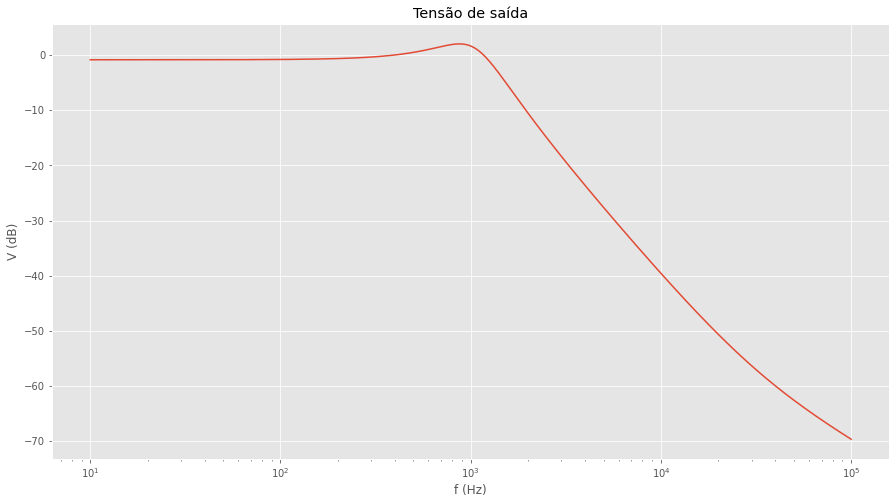

In [8]:
#%matplotlib notebook
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.semilogx(vo[:,0], vo[:,1])
ax1.set_ylabel("V (dB)")
ax1.set_xlabel("f (Hz)")
ax1.set_title("Tensão de saída")
plt.show()

Do gráfico acima tiramos os seguintes valores:

In [9]:
print(f"Valor de ressonância (f = {vo[np.argmax(vo[:,1]), 0]} Hz) : {np.max(vo[:,1])} dB")
print("Valor em 20kHz:",end=" ")
for a, b in vo:
    if a > 20000:
        print(f"{b} dB")
        break

Valor de ressonância (f = 870.96 Hz) : 2.0574 dB
Valor em 20kHz: -50.946 dB


## Comentários

Ambos os circuitos possuem um comportamento semelhante no que diz respeito ao comportamento geral: amplificam baixas frequências (na realidade, possuem ganho 1 para baixas frequências) e atenuam altas frequências. Para uma frequência de 20kHz ambos os circuitos possuem um ganho de -50dB, ou seja, reduzem a intensidade do sinal nessa frequência e de forma muito semelhante. A principal diferença está na ressonância. Tanto a frequência quanto o valor de ressonância diferem. Enquanto que o primeiro circuito tem um ganho de quase 15dB numa frequência de ressonância de 1kHz, o segundo circuito possui o pico de ganho com intensidade de apenas 2dB e numa frequência de ressonância de 870Hz.

# Conversor CA-CA

O circuito abaixo explora o uso de uma onda modulante com informação (senoide, frequência baixa) e uma onda portadora (triangular, frequência alta). O filtro passa-baixas no final do circuito visa recuperar o sinal de entrada removendo a alta frequência do sinal da portadora.

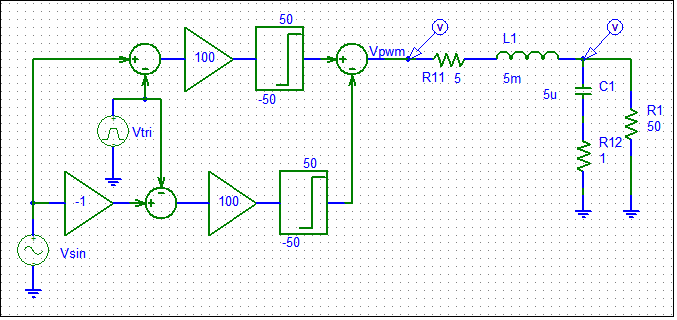

In [37]:
display(Image("cir3.png"))

Circuito em ngspice:

In [11]:
! cat netlist2.cir

.model amp gain(gain=100.0)
.model inv gain(gain=-1.0)
.model diff summer(in_gain=[1.0, -1.0] out_gain=1.0)
.model limit limit(out_lower_limit=-50.0 out_upper_limit=50.0)

Vsin vp 0 dc 0 sin(0 9 50)
Vtri vn 0 dc 0 pulse(-10 10 0 50u 50u 100u 100u)
ainv vp vpinv inv
ap [vp vn] vpp diff
an [vpinv vn] vnn diff
app vpp vpa amp
ann vnn vna amp
apl vpa vpl limit
anl vna vnl limit
a0 [vpl vnl] vpwm diff
r11 vpwm 2 5

* lpf
l1  2 vo 5m
c1 vo 4 5u
r12 4 0 1
r1 vo 0 50


In [12]:
vo = np.genfromtxt('data/03-vo.csv')
vi = np.genfromtxt('data/03-vi.csv')
vp = np.genfromtxt('data/03-vp.csv')
vn = np.genfromtxt('data/03-vn.csv')
vpa = np.genfromtxt('data/03-vpa.csv')
vna = np.genfromtxt('data/03-vna.csv')
ffto = np.genfromtxt('data/03-fft_vo.csv')
ffti = np.genfromtxt('data/03-fft_vi.csv')

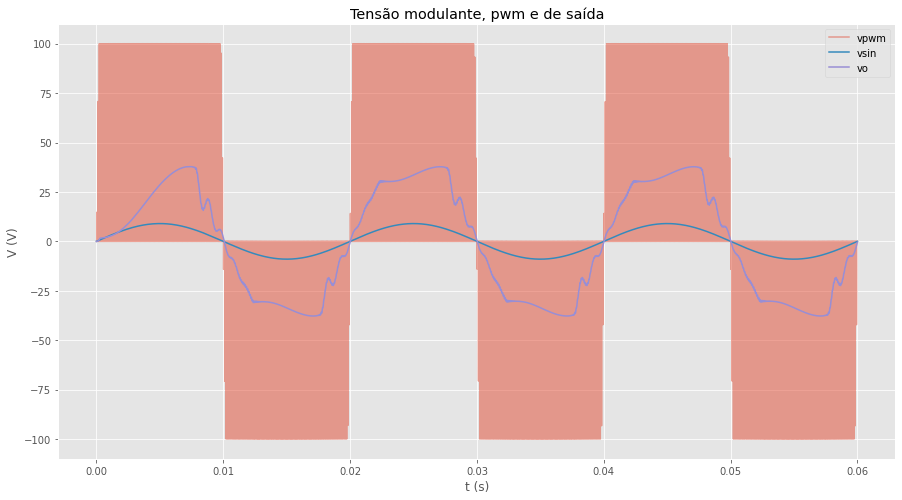

In [39]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vi[:,0], vi[:,1], alpha=0.5)
ax1.plot(vp[:,0], vp[:,1])
ax1.plot(vo[:,0], vo[:,1])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['vpwm', 'vsin', 'vo'])
ax1.set_title("Tensão modulante, pwm e de saída")
plt.show()

Na figura acima é possível perceber o sinal modulante senoidal, o resultado da conjunção do sinal modulante com a portadora, resultando num sinal pwm de alta frequência em 3 níveis e, por fim, o sinal de saída recuperado. Podemos perceber que o sinal recuperado possúi bastante deformação, sobretudo no pico da senoide.

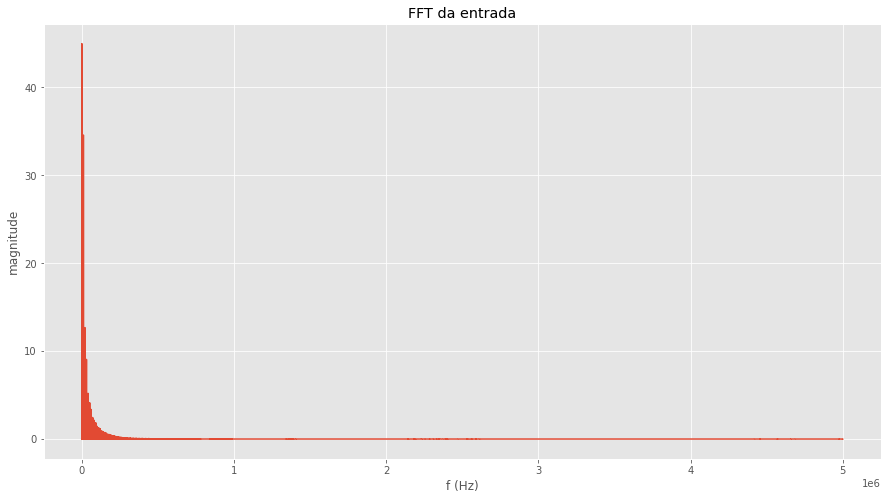

In [14]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ffti[:,0], ffti[:,1])
ax1.set_ylabel("magnitude")
ax1.set_xlabel("f (Hz)")
ax1.set_title("FFT da entrada")
plt.show()

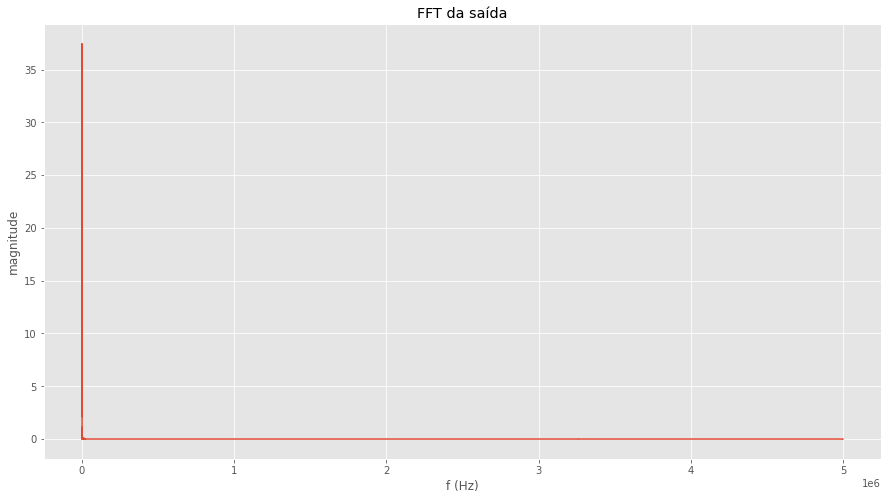

In [15]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ffto[:,0], ffto[:,1])
ax1.set_ylabel("magnitude")
ax1.set_xlabel("f (Hz)")
ax1.set_title("FFT da saída")
plt.show()

A análise da FFT nos mostra o filtro passa-baixas em funcionamento, que elimina as altas frequências, devolvendo um sinal mais limpo e similar a uma senoide pura.

# Conversor CA-CA 2

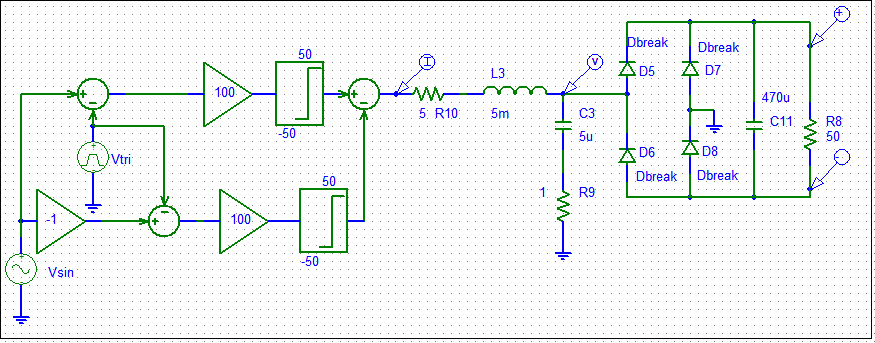

In [16]:
display(Image("cir4.png"))

Circuito em ngspice:

In [17]:
! cat netlist3.cir

.model amp gain(gain=100.0)
.model inv gain(gain=-1.0)
.model diff summer(in_gain=[1.0, -1.0] out_gain=1.0)
.model limit limit(out_lower_limit=-50.0 out_upper_limit=50.0)

Vsin vp 0 dc 0 sin(0 9 50)
Vtri vn 0 dc 0 pulse(-10 10 0 50u 50u 100u 100u)
ainv vp vpinv inv
ap [vp vn] vpp diff
an [vpinv vn] vnn diff
app vpp vpa amp
ann vnn vna amp
apl vpa vpl limit
anl vna vnl limit
a0 [vpl vnl] vpwm diff
r10 vpwm 2 5

* lpf
l3  2 vo 5m
c3 vo 4 5u
r9 4 0 1

* rectifier
d6 von vo 1n4002
d5 vo vop 1n4002
d8 von 0 1n4002
d7 0 vop 1n4002
c11 vop von 470u
r8 von vop 50


In [40]:
voo = np.genfromtxt('data/04-voo.csv')
i = np.genfromtxt('data/04-i.csv')
vi = np.genfromtxt('data/04-vi.csv')
vo = np.genfromtxt('data/04-vo.csv')

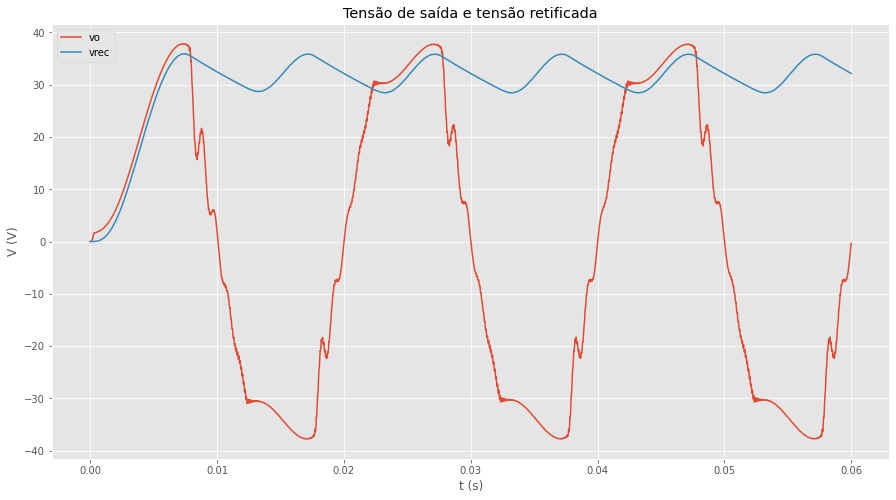

In [36]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vo[:,0], vo[:,1])
ax1.plot(voo[:,0], voo[:,1])
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['vo', 'vrec'])
ax1.set_title("Tensão de saída e tensão retificada")
plt.show()

Podemos perceber que apesar das deformações nos picos, isso não altera a característica do sinal retificado, que consegue prover um sinal DC satisfatório com baixo ripple.

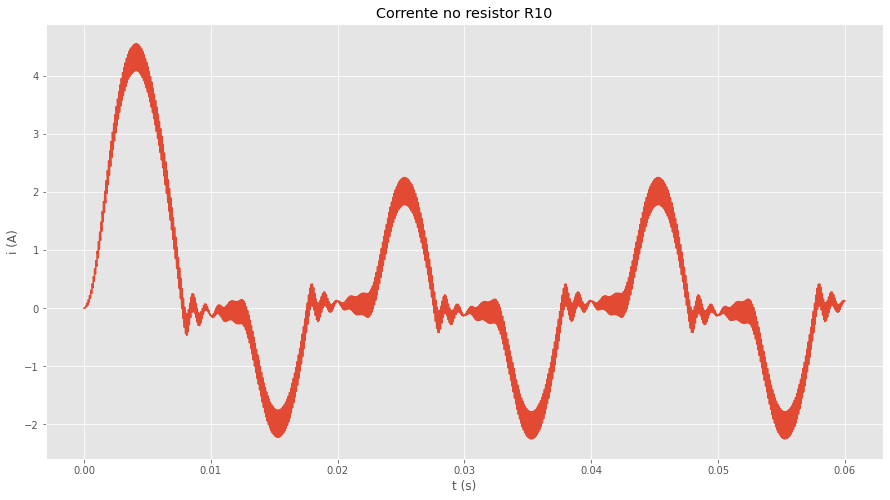

In [42]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(i[:,0], i[:,1])
ax1.set_ylabel("i (A)")
ax1.set_xlabel("t (s)")
ax1.set_title("Corrente no resistor R10")
plt.show()

Aqui podemos perceber que o causador das deformações provavelmente é a corrente drenada. As harmônicas no sinal da corrente altera as características do filtro passa-baixas, fazendo com que ele não funcione da maneira mais adequada, promovendo as deformações já citadas na onda senoidal recuperada.

# Anexos {-}

Arquivos utilizados e gerados para e na simulação:

In [21]:
%%bash
echo "ex1.cir"
echo "======="
echo ""
cat ex1.cir

ex1.cir

Low-pass filters

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

ac dec 100 10 100k

option numdgt=4
wrdata data/01-vo.csv vdb(3)
wrdata data/01-vi.csv vdb(1)

.endc

* END
.end


In [22]:
%%bash
echo "01.out"
echo "======="
echo ""
cat data/01.out

01.out

Note: No ".plot", ".print", or ".fourier" lines; no simulations run

Circuit: low-pass filters

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 401


In [23]:
%%bash
echo "ex2.cir"
echo "======="
echo ""
cat ex2.cir

ex2.cir

Low-pass filters

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

ac dec 100 10 100k

option numdgt=4
wrdata data/02-vo.csv vdb(3)
wrdata data/02-vi.csv vdb(1)

.endc

* END
.end


In [24]:
%%bash
echo "02.out"
echo "======="
echo ""
cat data/02.out

02.out

Note: No ".plot", ".print", or ".fourier" lines; no simulations run

Circuit: low-pass filters

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 401


In [25]:
%%bash
echo "ex3.cir"
echo "======="
echo ""
cat ex3.cir

ex3.cir

DC-AC converter

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

tran 0.1u 60m 0 2u

option numdgt=4
wrdata data/03-vp.csv vr(vp)
wrdata data/03-vpinv.csv vr(vpinv)
wrdata data/03-vn.csv vr(vn)
wrdata data/03-vpp.csv vr(vpp)
wrdata data/03-vnn.csv vr(vnn)
wrdata data/03-vpa.csv vr(vpa)
wrdata data/03-vna.csv vr(vna)
wrdata data/03-vpl.csv vr(vpl)
wrdata data/03-vnl.csv vr(vnl)
wrdata data/03-vo.csv vr(vo)
wrdata data/03-vi.csv vr(vpwm)

linearize vo vpwm

set specwindow=none

fft vo vpwm

wrdata data/03-fft_vo.csv mag(vo)
wrdata data/03-fft_vi.csv mag(vpwm)

.endc

* END
.end


In [26]:
%%bash
echo "03.out"
echo "======="
echo ""
cat data/03.out

03.out


Circuit: dc-ac converter

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp                                           0
vn                                         -10
vpinv                                        0
vpp                                         10
vnn                                         10
vpa                                       1000
vna                                       1000
vpl                                         50
vnl                                         50
vpwm                                         0
2                                            0
vo                                           0
4                                            0
l1#branch                                    0
vtri#branch                                  0
vsin#branc

In [27]:
%%bash
echo "ex4.cir"
echo "======="
echo ""
cat ex4.cir

ex4.cir

DC-AC converter

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

tran 0.1u 60m 0 2u

option numdgt=4
wrdata data/04-voo.csv vr(vop)-vr(von)
wrdata data/04-vp.csv vr(vp)
wrdata data/04-vpinv.csv vr(vpinv)
wrdata data/04-vn.csv vr(vn)
wrdata data/04-vo.csv vr(vo)
wrdata data/04-vi.csv vr(vpwm)

linearize vo vpwm

set specwindow=none

fft vo vpwm

wrdata data/03-fft_vo.csv mag(vo)
wrdata data/03-fft_vi.csv mag(vpwm)

.endc

* END
.end


In [28]:
%%bash
echo "04.out"
echo "======="
echo ""
cat data/04.out

04.out


Circuit: dc-ac converter

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp                                           0
vn                                         -10
vpinv                                        0
vpp                                         10
vnn                                         10
vpa                                       1000
vna                                       1000
vpl                                         50
vnl                                         50
vpwm                                         0
2                                 -3.21223e-32
vo                                -3.21223e-32
4                                            0
von                                2.62433e-18
vop                                2.62433e-18
l3#branch 